In [1]:
from pylab import *
from numpy import *

## Power Iteration Method

In [2]:
A = array([[1,-1,-1],[3,1,1],[-3,2,-1]])
n=len(A)

print("A=")
print(A)

X= random.rand(n)

l1=0

while True:
    Y = A @ X
    Y=Y/norm(Y)
    l=vdot(Y,(A@Y))/ vdot(Y,Y)

    if abs(l-l1)<10**-8:
        break
    X=Y
    l1=l
    
print("\nDominant Eigenvalue=")
print(l.round(decimals=4),'\n')

print("\nDominant Eigenvector=")
print((Y/norm(Y)).round(decimals=4),'\n')

A=
[[ 1 -1 -1]
 [ 3  1  1]
 [-3  2 -1]]

Dominant Eigenvalue=
-2.3797 


Dominant Eigenvector=
[ 0.1492 -0.4     0.9043] 



## Generalization 

In [3]:
def genpower(A):
    
    n=len(A)
    
    eigval=zeros(n)
    eigvec=zeros((n,n))
    dom=zeros((n,n))
    
    for i in range(0,n):

        lambda1=0.0

        X= array([random.rand(n)]).T

        c=1

        while(True):
            lambda_ = X.flat[abs(X).argmax()]
            Y = X/lambda_
            X=dot(A,Y)

            if abs(lambda_-lambda1)<10**-5:
                break
            lambda1=lambda_

            c=c+1

        eigval[i]=lambda_
        Y=Y/norm(Y)

        dom[:,i]=Y[:,0]
        G=dom[:,i]

        for j in range(0,i):
            G=(eigval[i]-eigval[i-j-1])*G+eigval[i-j-1]*dot(dom[:,i-j-1].T,G)*dom[:,i-j-1]
            G=G/norm(G)

        eigvec[:,i]=G

        A = A - lambda_*dot(Y,Y.T)
    
    idx = eigval.argsort()

    eigval = eigval[idx]
    eigvec = eigvec[:,idx]
    
    return array(eigval),array(eigvec)

In [4]:
A=array([[19,-1,-2,2,0.5],[-1,5,-1,-2,1],[-2,-1,2,-1,5],[2,-2,-1,3,0.1],[50,-1,-2,2,2]])

eigval,eigvec=genpower(A)
 
print("Eigenvalues of A:")
print(eigval,'\n')

print("Eigenvectors of A:")
print(eigvec,'\n')

Eigenvalues of A:
[-2.41666039  1.03897543  5.94984401  7.30353875 19.12428223] 

Eigenvectors of A:
[[ 0.07569351  0.00198846 -0.06855804  0.11079006  0.32279146]
 [ 0.24533402 -0.45578246  0.30686183  0.09729879  0.02195144]
 [ 0.76365365 -0.5071871  -0.75946574  0.65348706  0.22738055]
 [ 0.2137999  -0.71857628 -0.0163715  -0.12858957  0.02890687]
 [-0.55245309 -0.13663003 -0.5692797   0.73121672  0.91803393]] 



## Quantum Harmonic Oscillator

In [5]:
N=100
xi,xf=-6,6
X=linspace(xi,xf,N)
delta=(xf-xi)/N

In [6]:
def U(y):            # dimensionless potential function
    return y**2

In [7]:
T = diag(-2*X**0,0) + diag(X[1:N]**0,-1) + diag(X[1:N]**0,1)    # double derivative tri-diagonal matrix

P = diag(U(X))                      # potential diagonal matrix

H = T/(-delta**2) + P               # Hermitian Matrix

H_eigenvalues, H_eigenvectors = genpower(H)
H_eigenvectors /= -sqrt(N*delta)

mod=[H_eigenvectors[:,i] @ H_eigenvectors[:,i].conj().T for i in range(0,N)]

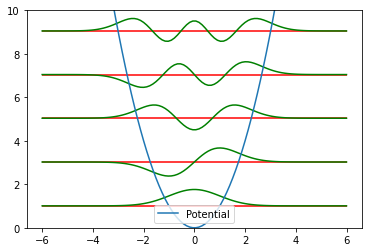

In [8]:
n=5

plot(X,10*H_eigenvectors[:,0:n]+H_eigenvalues[0:n],color="green")
plot(X,U(X),label="Potential")
hlines(H_eigenvalues[0:n],xmin=min(X),xmax=max(X),color="red")
ylim(0,10)
legend()